In [41]:
# Import libraries
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl
# Pandas
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)
data = clean_df.sample(10000)

In [43]:
data.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
189038,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
955840,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
584508,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,4
811888,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
525482,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3


In [53]:
data = data.drop(columns = ['ICU','intubation'])

In [54]:
# create a train/test split
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['death'])

In [55]:
X_train = train.drop(columns = ['death'])
y_train = train['death']

X_test = test.drop(columns = ['death'])
y_test = test['death']

In [56]:
# Random Forest
random_forest = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test))

The accuracy of the Random Forests model is :	 0.8426666666666667


In [57]:
import shap
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(random_forest)

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

In [64]:
test.head(50)

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,new_age
661934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4
1158377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1175914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1175829,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3
663265,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2
357592,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
234235,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4
539327,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3
721880,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3
787941,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,4


In [60]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
test.loc[[661934]]

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,new_age
661934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4


Choosen instance refers to a Male patient of age between 49 and 64. This patient suffers from pneumonia and he died from covud. Let's see what and how our model predicts his death.

In [61]:
# Calculate Shap values
choosen_instance = X_test.loc[[661934]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :
Model predicted 0.89 (death), whereas the base_value is 0.4995. Biggest effect is person having pneumonia; This has decreased his chance of survival significantly.

In [62]:
test.loc[[1158377]] 

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,new_age
1158377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Choosen instance refers to a healthy Male patient of age between 17 and 32. Let's see what and how our model predicts his survival.

In [63]:
# Calculate Shap values
choosen_instance = X_test.loc[[1158377]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :
What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

Model predicted 0.03 (survived), whereas the base_value is 0.4995. Biggest effect is person being a young adult and doesn't suffer from pneumonia; This has increased his chance of survival significantly.

In [65]:
test.loc[[539327]] 

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,new_age
539327,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3


Choosen instance refers to a Male patient of age between 33 and 48. The patient has obesity and pneumonia. Let's see what and how our model predicts his death.

In [66]:
# Calculate Shap values
choosen_instance = X_test.loc[[539327]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :
Model predicted 0.9 (death), whereas the base_value is 0.4995. Biggest effect is person suffering from pneumonia; This has decreased his chance of survival significantly.

In [67]:
test.loc[[125595]] 

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,new_age
125595,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,4


Choosen instance refers to a female patient of age between 49 and 64. The patient smokes and considered obese. Let's see what and how our model predicts his survival.

In [68]:
# Calculate Shap values
choosen_instance = X_test.loc[[125595]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

##### Interpretation :
Model predicted 0.43 (death), whereas the base_value is 0.4995. Biggest effect is that the person doesn't suffer from pneumonia; But as we can see having obesity and age greater than 50 increased her chance of death. Luckily this patient survived.

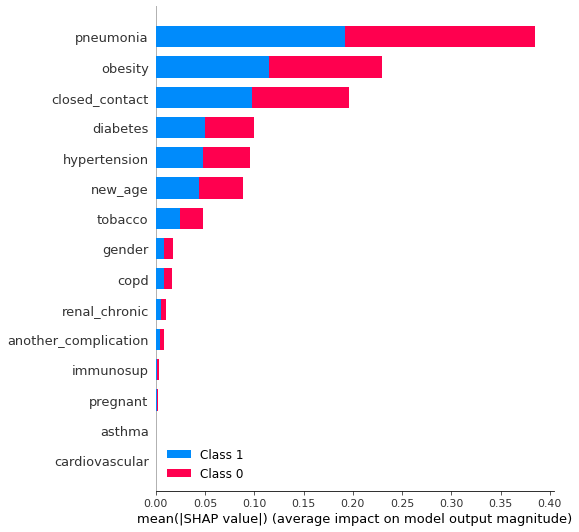

In [69]:
shap.summary_plot(shap_values, X_train)

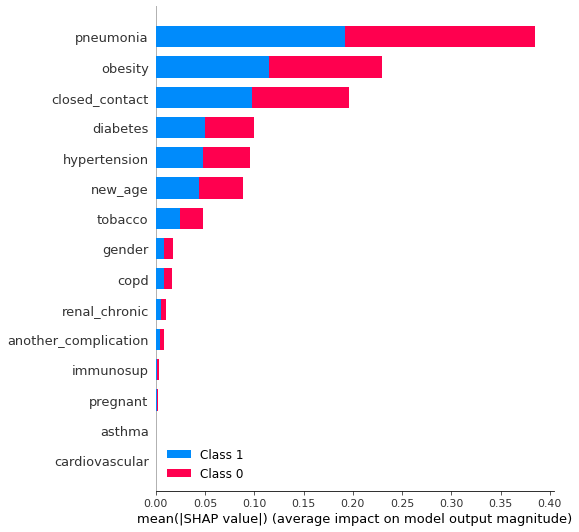

In [71]:
shap.summary_plot(shap_values, X_test)

In [74]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    
    '''
    A function for building a SHAP waterfall plot.
    
    SHAP waterfall plot is used to visualize the most important features in a descending order.
    
    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display
    
    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot
    
    '''
    
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

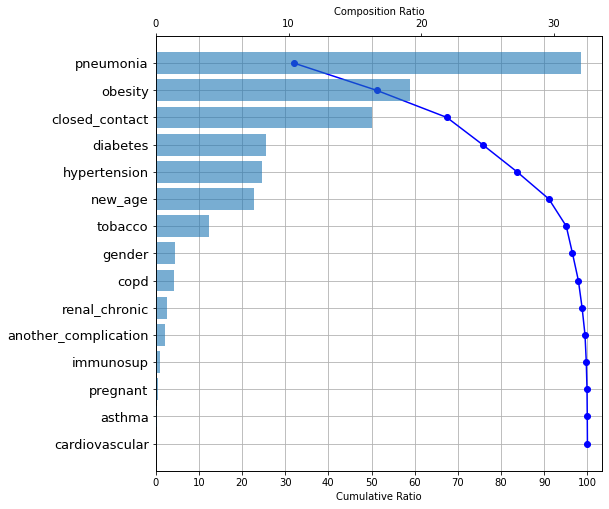

In [77]:
# Shapp waterfall plot
make_shap_waterfall_plot(shap_values[1], X_train)

Based on the SHAP waterfall plot, we can say that pneumonia is the most important feature in the model, which has more than 30% of the model's explainability. Also, these top 10 features provide 100% of the model's interpretation.

Wall time: 0 ns


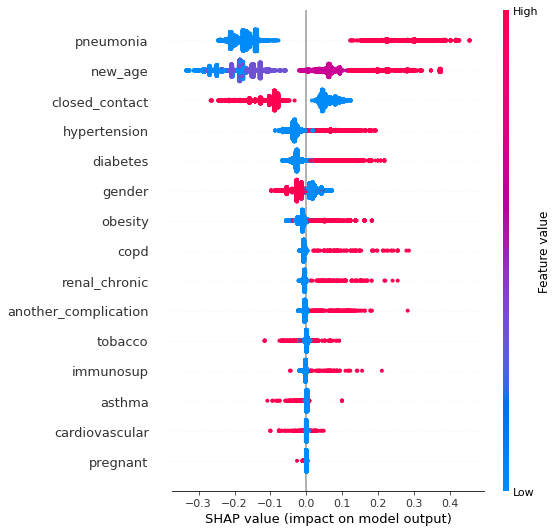

In [92]:
%time
samples = X_train

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

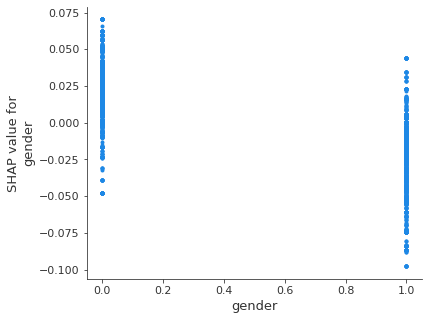

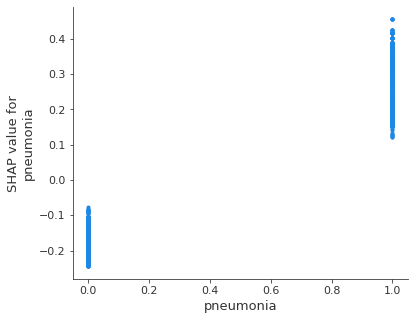

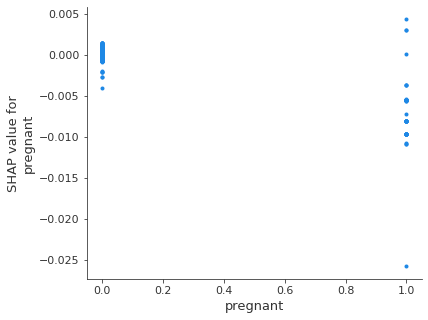

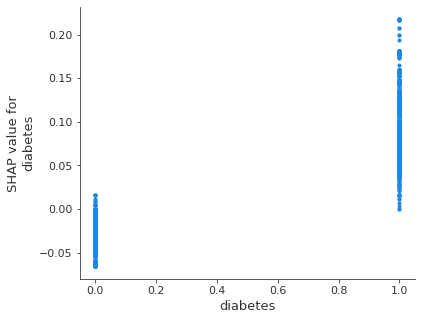

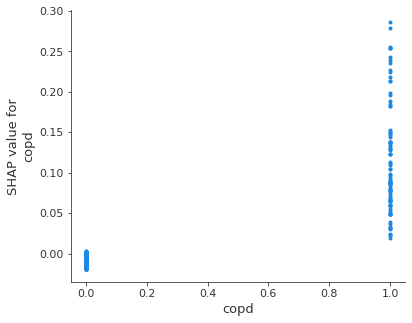

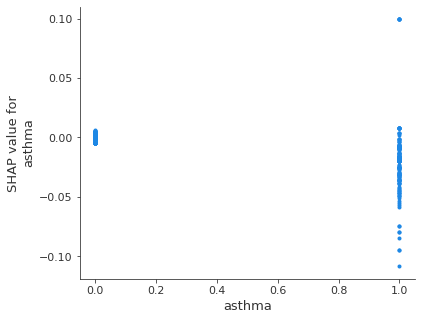

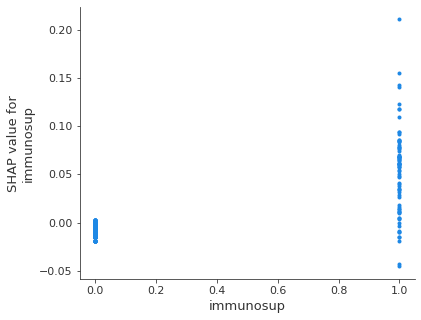

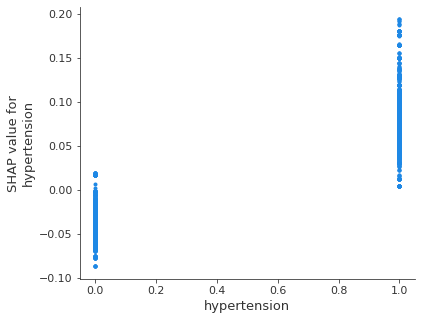

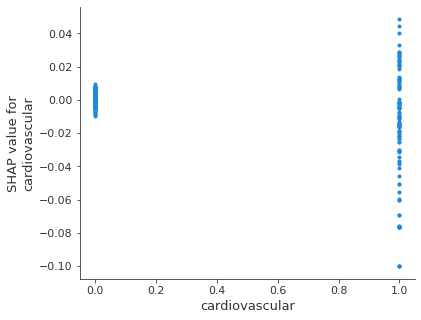

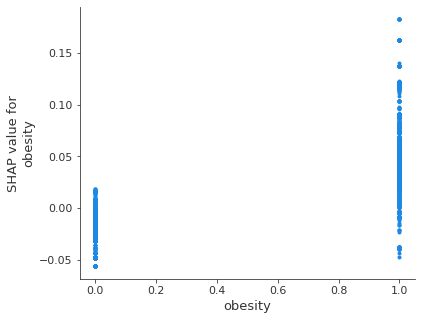

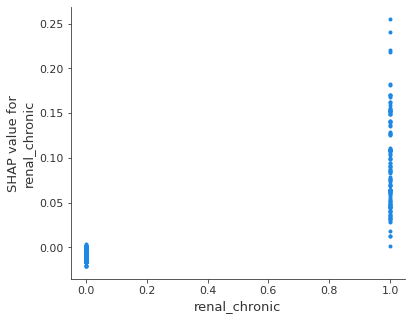

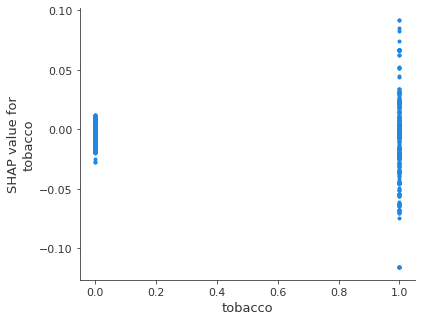

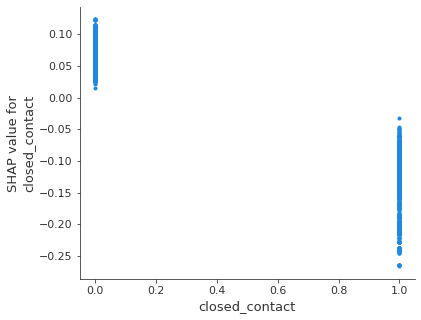

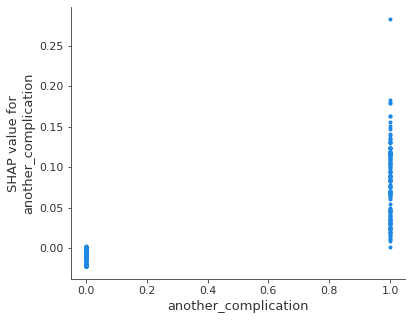

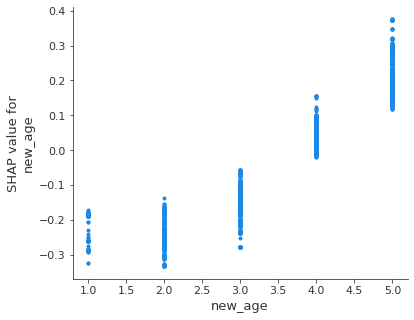

In [97]:
top_features = ['pneumonia', 'new_age' , 'obesity']
for feature in samples.columns:
    shap.dependence_plot(feature, shap_values[1], samples, interaction_index=None)

In [29]:
# print the JS visualization code to the notebook
shap.initjs()

In [23]:
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [24]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_resampled_s),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.68561
[100]	test-logloss:0.32199
[200]	test-logloss:0.22904
[300]	test-logloss:0.20123
[400]	test-logloss:0.19285
[500]	test-logloss:0.19093
[545]	test-logloss:0.19082


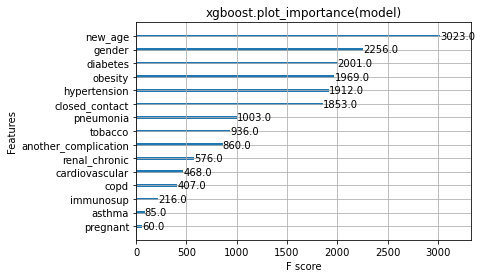

In [25]:
#representing the importance of each feature in our dataset
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

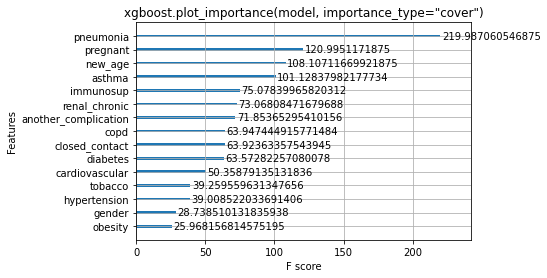

In [26]:
# Cover. The number of times a feature is used to split the data across all trees weighted by 
#the number of training data points that go through those splits.

xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

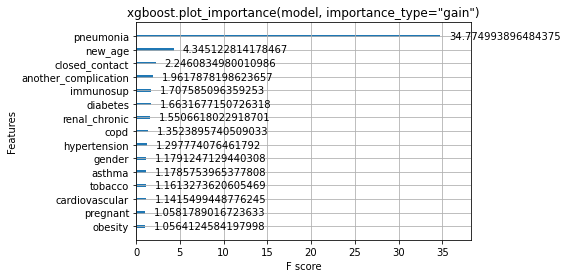

In [27]:
# Gain: The average training loss reduction gained when using a feature for splitting.
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

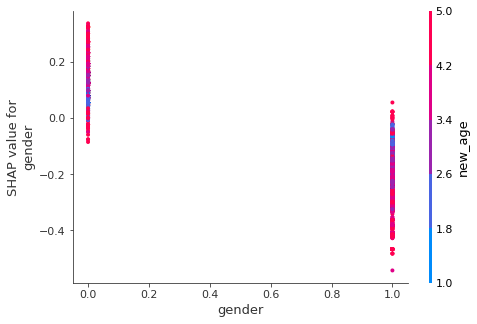

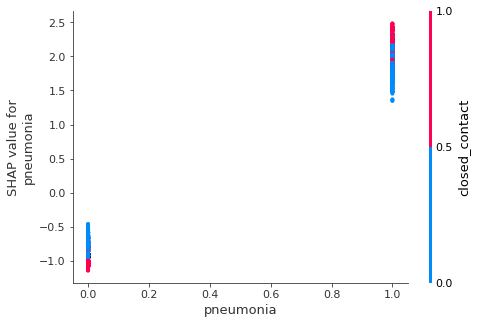

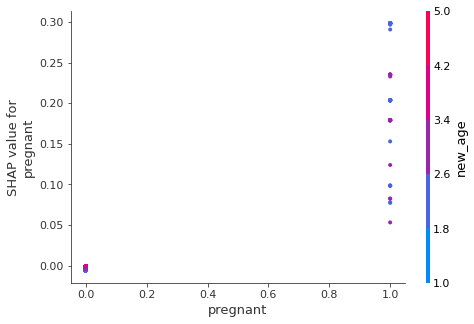

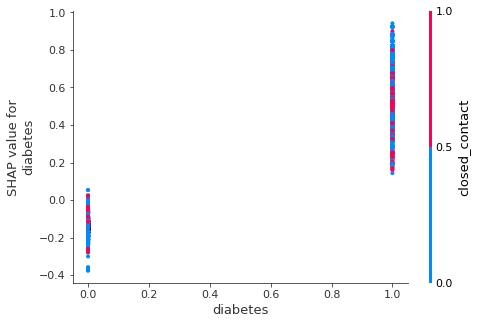

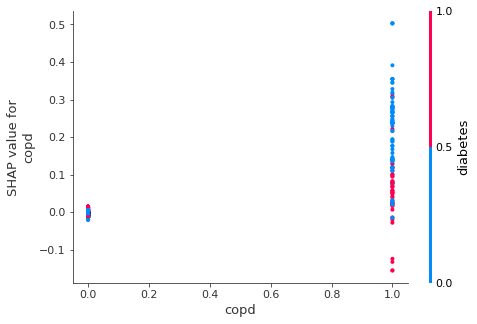

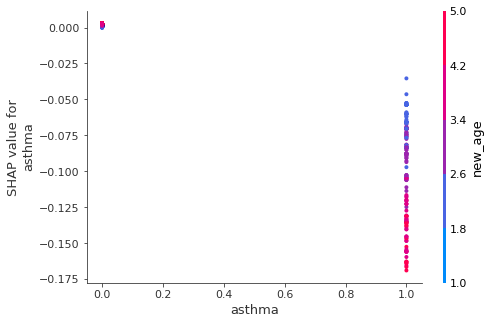

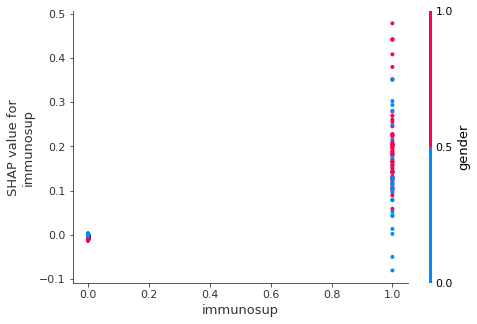

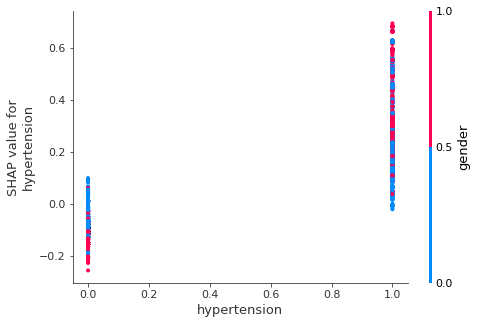

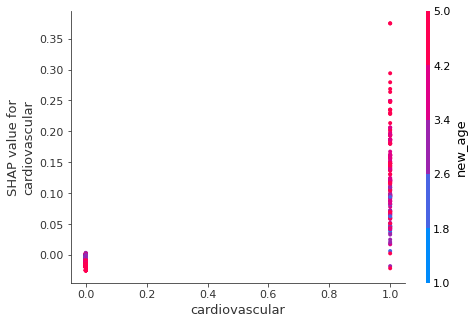

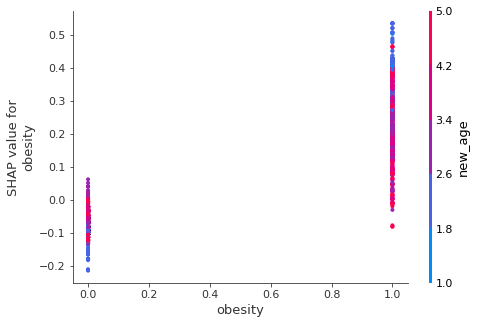

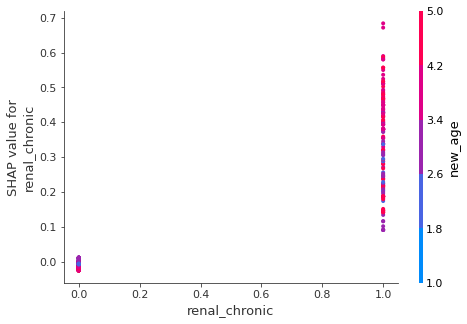

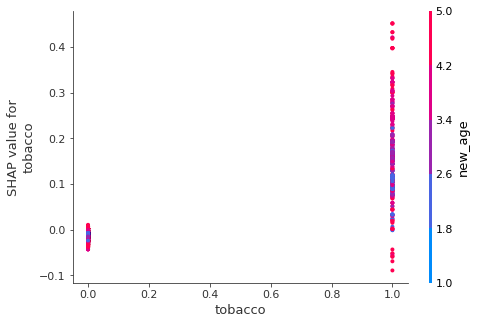

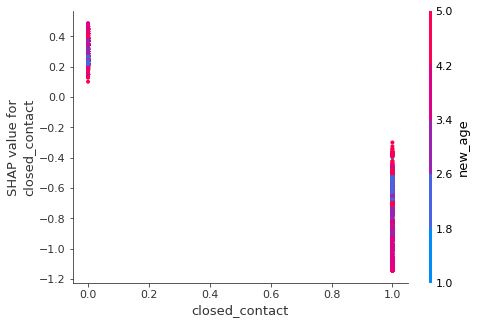

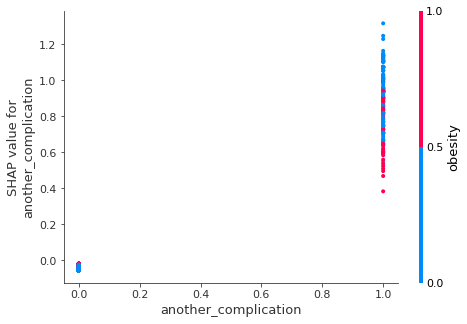

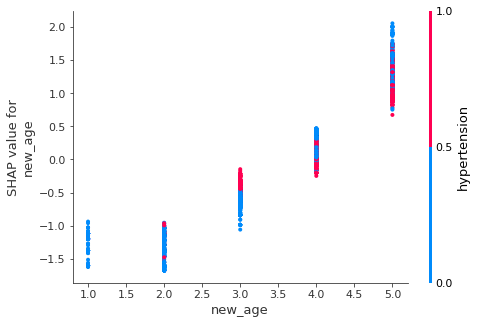

In [41]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)